In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers
import matplotlib.pyplot as plt

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def baseline_model(optimizer):
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compile model
  
  if(optimizer == "SGD"):
    sgd = optimizers.SGD(lr=0.01, decay = 1e-6, momentum=0.9, nesterov = True)
  
  elif(optimizer == "RMSprop"):
    sgd = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    
  elif(optimizer == "Adagrad"):
    sgd = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
  
  elif(optimizer == "Adadelta"):
    sgd = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
  
  elif(optimizer == "Adam"):
    sgd = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

  elif(optimizer == "Adamax"):
    sgd = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

  elif(optimizer == "Nadam"):
    sgd = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

  elif(optimizer == "TFOptimizer"):
    sgd = optimizers.TFOptimizer(optimizer)
    
    
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

In [0]:
# build the model

def Model(optimizer):
  model = baseline_model(optimizer)
  # Fit the model
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Baseline Error: %.2f%%" % (100-scores[1]*100))
  print("Accuracy of {} model is {} % ".format(optimizer,scores[1]*100))
  return history 

In [40]:
SGDHistory = Model("SGD")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.5110 - acc: 0.8629 - val_loss: 0.2909 - val_acc: 0.9182
Epoch 2/10
 - 4s - loss: 0.2736 - acc: 0.9237 - val_loss: 0.2383 - val_acc: 0.9329
Epoch 3/10
 - 4s - loss: 0.2281 - acc: 0.9367 - val_loss: 0.2097 - val_acc: 0.9402
Epoch 4/10
 - 4s - loss: 0.1973 - acc: 0.9456 - val_loss: 0.1836 - val_acc: 0.9486
Epoch 5/10
 - 4s - loss: 0.1741 - acc: 0.9513 - val_loss: 0.1667 - val_acc: 0.9526
Epoch 6/10
 - 4s - loss: 0.1553 - acc: 0.9571 - val_loss: 0.1526 - val_acc: 0.9563
Epoch 7/10
 - 4s - loss: 0.1403 - acc: 0.9611 - val_loss: 0.1407 - val_acc: 0.9594
Epoch 8/10
 - 4s - loss: 0.1279 - acc: 0.9648 - val_loss: 0.1313 - val_acc: 0.9623
Epoch 9/10
 - 4s - loss: 0.1173 - acc: 0.9680 - val_loss: 0.1220 - val_acc: 0.9644
Epoch 10/10
 - 4s - loss: 0.1082 - acc: 0.9705 - val_loss: 0.1144 - val_acc: 0.9670
Baseline Error: 3.30%
Accuracy of SGD model is 96.7 % 


In [41]:
RMSpropHistory = Model("RMSprop")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2673 - acc: 0.9218 - val_loss: 0.1280 - val_acc: 0.9618
Epoch 2/10
 - 5s - loss: 0.1033 - acc: 0.9684 - val_loss: 0.0810 - val_acc: 0.9746
Epoch 3/10
 - 5s - loss: 0.0669 - acc: 0.9797 - val_loss: 0.0779 - val_acc: 0.9736
Epoch 4/10
 - 5s - loss: 0.0481 - acc: 0.9858 - val_loss: 0.0783 - val_acc: 0.9746
Epoch 5/10
 - 5s - loss: 0.0349 - acc: 0.9897 - val_loss: 0.0610 - val_acc: 0.9816
Epoch 6/10
 - 5s - loss: 0.0253 - acc: 0.9928 - val_loss: 0.0628 - val_acc: 0.9814
Epoch 7/10
 - 5s - loss: 0.0193 - acc: 0.9947 - val_loss: 0.0655 - val_acc: 0.9798
Epoch 8/10
 - 5s - loss: 0.0143 - acc: 0.9960 - val_loss: 0.0653 - val_acc: 0.9819
Epoch 9/10
 - 5s - loss: 0.0107 - acc: 0.9973 - val_loss: 0.0610 - val_acc: 0.9825
Epoch 10/10
 - 5s - loss: 0.0082 - acc: 0.9980 - val_loss: 0.0757 - val_acc: 0.9801
Baseline Error: 1.99%
Accuracy of RMSprop model is 98.00999999999999 % 


In [42]:
AdagradHistory = Model("Adagrad")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2588 - acc: 0.9268 - val_loss: 0.1368 - val_acc: 0.9597
Epoch 2/10
 - 5s - loss: 0.1168 - acc: 0.9674 - val_loss: 0.1048 - val_acc: 0.9683
Epoch 3/10
 - 4s - loss: 0.0877 - acc: 0.9757 - val_loss: 0.0910 - val_acc: 0.9742
Epoch 4/10
 - 4s - loss: 0.0714 - acc: 0.9808 - val_loss: 0.0816 - val_acc: 0.9757
Epoch 5/10
 - 5s - loss: 0.0603 - acc: 0.9841 - val_loss: 0.0768 - val_acc: 0.9761
Epoch 6/10
 - 5s - loss: 0.0518 - acc: 0.9864 - val_loss: 0.0713 - val_acc: 0.9778
Epoch 7/10
 - 5s - loss: 0.0457 - acc: 0.9887 - val_loss: 0.0725 - val_acc: 0.9777
Epoch 8/10
 - 5s - loss: 0.0408 - acc: 0.9898 - val_loss: 0.0656 - val_acc: 0.9805
Epoch 9/10
 - 4s - loss: 0.0365 - acc: 0.9915 - val_loss: 0.0648 - val_acc: 0.9804
Epoch 10/10
 - 5s - loss: 0.0332 - acc: 0.9926 - val_loss: 0.0636 - val_acc: 0.9806
Baseline Error: 1.94%
Accuracy of Adagrad model is 98.06 % 


In [43]:
AdadeltaHistory = Model("Adadelta")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.3293 - acc: 0.9064 - val_loss: 0.1844 - val_acc: 0.9492
Epoch 2/10
 - 6s - loss: 0.1442 - acc: 0.9583 - val_loss: 0.1097 - val_acc: 0.9684
Epoch 3/10
 - 6s - loss: 0.0992 - acc: 0.9724 - val_loss: 0.0897 - val_acc: 0.9732
Epoch 4/10
 - 6s - loss: 0.0748 - acc: 0.9785 - val_loss: 0.0908 - val_acc: 0.9726
Epoch 5/10
 - 6s - loss: 0.0581 - acc: 0.9839 - val_loss: 0.0719 - val_acc: 0.9786
Epoch 6/10
 - 6s - loss: 0.0478 - acc: 0.9867 - val_loss: 0.0700 - val_acc: 0.9780
Epoch 7/10
 - 6s - loss: 0.0385 - acc: 0.9900 - val_loss: 0.0652 - val_acc: 0.9792
Epoch 8/10
 - 6s - loss: 0.0320 - acc: 0.9917 - val_loss: 0.0611 - val_acc: 0.9812
Epoch 9/10
 - 6s - loss: 0.0264 - acc: 0.9936 - val_loss: 0.0590 - val_acc: 0.9823
Epoch 10/10
 - 6s - loss: 0.0220 - acc: 0.9951 - val_loss: 0.0639 - val_acc: 0.9810
Baseline Error: 1.90%
Accuracy of Adadelta model is 98.1 % 


In [44]:
AdamHistory = Model("Adam")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2774 - acc: 0.9213 - val_loss: 0.1376 - val_acc: 0.9598
Epoch 2/10
 - 5s - loss: 0.1104 - acc: 0.9683 - val_loss: 0.0983 - val_acc: 0.9703
Epoch 3/10
 - 5s - loss: 0.0707 - acc: 0.9792 - val_loss: 0.0759 - val_acc: 0.9765
Epoch 4/10
 - 5s - loss: 0.0495 - acc: 0.9854 - val_loss: 0.0679 - val_acc: 0.9787
Epoch 5/10
 - 5s - loss: 0.0352 - acc: 0.9902 - val_loss: 0.0666 - val_acc: 0.9777
Epoch 6/10
 - 5s - loss: 0.0268 - acc: 0.9926 - val_loss: 0.0656 - val_acc: 0.9803
Epoch 7/10
 - 5s - loss: 0.0196 - acc: 0.9950 - val_loss: 0.0610 - val_acc: 0.9805
Epoch 8/10
 - 5s - loss: 0.0146 - acc: 0.9966 - val_loss: 0.0645 - val_acc: 0.9791
Epoch 9/10
 - 5s - loss: 0.0112 - acc: 0.9976 - val_loss: 0.0634 - val_acc: 0.9807
Epoch 10/10
 - 5s - loss: 0.0086 - acc: 0.9982 - val_loss: 0.0600 - val_acc: 0.9817
Baseline Error: 1.83%
Accuracy of Adam model is 98.17 % 


In [45]:
AdamaxHistory = Model("Adamax")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2866 - acc: 0.9180 - val_loss: 0.1643 - val_acc: 0.9526
Epoch 2/10
 - 5s - loss: 0.1408 - acc: 0.9605 - val_loss: 0.1207 - val_acc: 0.9640
Epoch 3/10
 - 5s - loss: 0.0999 - acc: 0.9723 - val_loss: 0.0991 - val_acc: 0.9707
Epoch 4/10
 - 5s - loss: 0.0755 - acc: 0.9790 - val_loss: 0.0802 - val_acc: 0.9756
Epoch 5/10
 - 5s - loss: 0.0597 - acc: 0.9831 - val_loss: 0.0758 - val_acc: 0.9774
Epoch 6/10
 - 5s - loss: 0.0476 - acc: 0.9872 - val_loss: 0.0667 - val_acc: 0.9792
Epoch 7/10
 - 5s - loss: 0.0380 - acc: 0.9901 - val_loss: 0.0656 - val_acc: 0.9797
Epoch 8/10
 - 5s - loss: 0.0303 - acc: 0.9923 - val_loss: 0.0650 - val_acc: 0.9799
Epoch 9/10
 - 5s - loss: 0.0251 - acc: 0.9940 - val_loss: 0.0617 - val_acc: 0.9806
Epoch 10/10
 - 5s - loss: 0.0198 - acc: 0.9957 - val_loss: 0.0572 - val_acc: 0.9817
Baseline Error: 1.83%
Accuracy of Adamax model is 98.17 % 


In [46]:
NadamHistory = Model("Nadam")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2356 - acc: 0.9323 - val_loss: 0.1066 - val_acc: 0.9703
Epoch 2/10
 - 6s - loss: 0.0831 - acc: 0.9757 - val_loss: 0.0811 - val_acc: 0.9743
Epoch 3/10
 - 6s - loss: 0.0502 - acc: 0.9850 - val_loss: 0.0649 - val_acc: 0.9797
Epoch 4/10
 - 6s - loss: 0.0334 - acc: 0.9901 - val_loss: 0.0687 - val_acc: 0.9785
Epoch 5/10
 - 6s - loss: 0.0222 - acc: 0.9938 - val_loss: 0.0643 - val_acc: 0.9774
Epoch 6/10
 - 6s - loss: 0.0151 - acc: 0.9955 - val_loss: 0.0626 - val_acc: 0.9801
Epoch 7/10
 - 6s - loss: 0.0110 - acc: 0.9971 - val_loss: 0.0635 - val_acc: 0.9820
Epoch 8/10
 - 6s - loss: 0.0080 - acc: 0.9980 - val_loss: 0.0771 - val_acc: 0.9786
Epoch 9/10
 - 6s - loss: 0.0097 - acc: 0.9973 - val_loss: 0.0704 - val_acc: 0.9810
Epoch 10/10
 - 6s - loss: 0.0075 - acc: 0.9978 - val_loss: 0.0707 - val_acc: 0.9801
Baseline Error: 1.99%
Accuracy of Nadam model is 98.00999999999999 % 


**Here Adam optimizer is giving better accuracy then all other optimizers.History of Adam optimizers is given below during training phase**

In [0]:
# list all data in history

def history_opt(history):
  
  print("Accuracy Plot Of Adam Optimizer Model is")
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

Accuracy Plot Of Adam Optimizer Model is
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


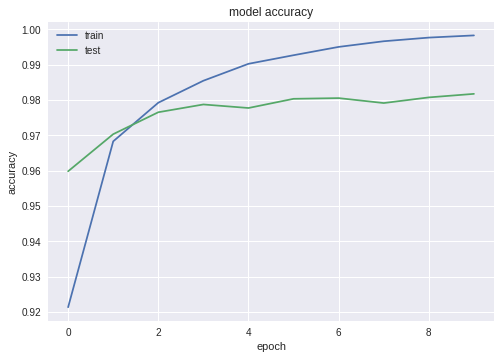

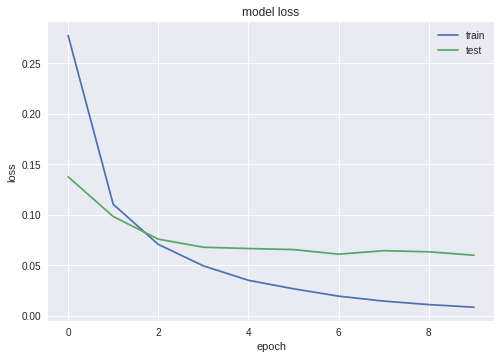

In [54]:

#Plotting of Accuracy Model of Adam Optimizer.
history_opt(AdamHistory)

**So from above we can conclude the Adam optimizer converges till it reaches 8 epochs so there is no point in increasing more epochs.**